In [15]:
import sys
sys.path.append('../')

In [16]:
import os
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [17]:
image_folder = '../data/Image/LIDC-IDRI-0018/'
mask_folder = '../data/Mask/LIDC-IDRI-0018/'

image_file = image_folder.split('/')[-2][-4:] + '_NI001.npy'
mask_file = image_folder.split('/')[-2][-4:] + '_MA001.npy'

# image_folder = '../data/Clean/Image/LIDC-IDRI-0028/'
# mask_folder = '../data/Clean/Mask/LIDC-IDRI-0028/'

# image_file = image_folder.split('/')[-2][-4:] + '_CN001.npy'
# mask_file = image_folder.split('/')[-2][-4:] + '_CM001.npy'


In [18]:
img = np.load(os.path.join(image_folder, image_file))
mask = np.load(os.path.join(mask_folder, mask_file))

In [19]:
mask.shape

(128, 128, 128)

-5952500.125
-5835637.0
-5727026.6875
-5591178.5625
-5436548.625
-5285417.625
-5147307.4375
-5033998.75
-4951167.5625
-4902759.6875
-4884964.25
-4847023.3125
-4788969.3125
-4738964.0625
-4723375.875
-4726437.8125
-4717800.8125
-4720990.8125
-4754591.0
-4810556.8125
-4870343.8125
-4930807.625
-4998764.625
-5074610.8125
-5112324.0
-5145150.625
-5211461.0
-5293406.1875
-5366023.1875
-5426607.6875
-5496308.6875
-5582288.375
-5706048.375
-5848253.6875
-5987817.625
-6113329.6875
-6249085.3125
-6394124.9375
-6567996.8125
-6753209.8125
-6918598.5
-7087287.0
-7270407.6875
-7458467.5
-7645544.4375
-7838175.75
-8007736.6875
-8122252.5625
-8227898.4375
-8351727.125
-8514706.8125
-8616370.5625
-8670845.1875
-8734865.4375
-8788653.9375
-8869280.5625
-8958713.4375
-9045569.125
-9110897.9375
-9146431.4375
-9182076.6875
-9170850.375
-9120632.6875
-9068837.6875
-9031781.0625
-8987121.4375
-8938708.1875
-8929374.6875
-8943555.875
-8971155.125
-8984959.0625
-9010333.3125
-9048350.375
-9094426.9375
-911586

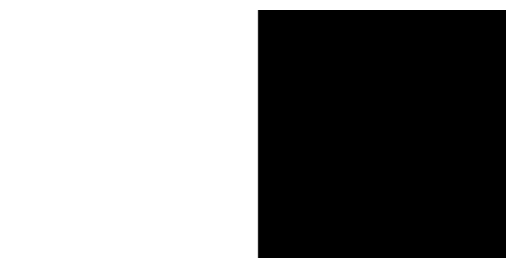

In [20]:
length = mask.shape[0]
images = []
masks = []
for i in range(length):
    # normalize to -1 to 1
    data = img[i]
    if data.max() != data.min():
        data = (data - data.min()) / (data.max() - data.min())
        data = data * 2 - 1
    images.append(data)
    masks.append(mask[i])
    
fig = plt.figure()
plt.axis("off")
ims = [[plt.imshow(np.concatenate((img, np.where(mask > 0, 1, -1)), axis=1), cmap='gray')] for img, mask in zip(images, masks)]
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat_delay=1000, blit=True)

ani.save("../outputs/image.gif", writer='pillow')